<a href="https://colab.research.google.com/github/coader-128/Tensorflow/blob/Transfer_Learning_fine_tuning/Transfer_Learning_Fine_Tuning_007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WHAT ARE YOU GOING TO COVER

1. Fine tuning transfer learning
2. introduce the keras functional api
3. data argmentation layer
4. introduce **ModelCheckpoint callback**


In [ ]:
# check if using gpu
!nvidia-smi

Mon Oct  2 09:23:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-10-02 09:23:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-02 09:23:07 (74.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# import helper function and use it from there

from helper_functions import create_tensorboard_callback , plot_loss_curves , unzip_data , walk_through_dir


## Here we will  use pretrained models within tf.keras.application and apply them to our own problem

In [ ]:
# get 10% of training  data of 10 classes

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-10-02 09:23:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.7MB/s    in 8.4s    

2023-10-02 09:23:20 (19.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
## check how mant images are there

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/gri

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"



In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)

#new method as its faster than before

train_data  =  tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                   image_size = IMG_SIZE,
                                                                   label_mode = "categorical",
                                                                   batch_size = 32,
                                                                   color_mode = "rgb")

test_data  =  tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                   image_size = IMG_SIZE,
                                                                   label_mode = "categorical",
                                                                   batch_size = 32,
                                                                   color_mode = "rgb")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#class names
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
#see an example of batch of data
for images , labels in train_data.take(1):
  print(images , labels)

tf.Tensor(
[[[[  0.           0.           2.        ]
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]
   ...
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]]

  [[  0.           0.           2.        ]
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]
   ...
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]]

  [[  0.           0.           2.        ]
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]
   ...
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]]

  ...

  [[  0.           0.           2.        ]
   [  0.           0.           2.        ]
   [  0.           0.           2.        ]
   ...
   [  0.           0.   

In [ ]:
### we are going to use the functional api to create the model



### base model

In [ ]:

# 1.  create base model
base_model = tf.keras.applications.EfficientNetB0(include_top = False , weights='imagenet')

# 2. freeze the base model
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape = (224,224,3) , name = "input_layer")

# 4. if using RESNET50_v2 you need to normalize input(you dont have to do it for it it aready has)
# x = tf.keras.layers.experimental.preprocessing.Rescalling(1/255.)(inputs)


# 5. pass the inputs to base model

x = base_model(inputs)
print(f"shape after passing inputs through base model : {x.shape}")

# 6. average poll th eoutputs of the base model  (aggregate all the important information)
x = tf.keras.layers.GlobalAveragePooling2D( name = "global_averge_pooling_layer")(x)

print(f"Shape after globalAveragePooling2D  {x.shape}")

# 7. create th eoutput layer

output = tf.keras.layers.Dense(10, activation = "softmax" , name = "output_layer")(x)

# 8. combine th einputs the outputs into a model
model_0 = tf.keras.Model(inputs , output)

# 10. Compile the model

model_0.compile(loss = "categorical_crossentropy",
                optimizer  = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_0 = model_0.fit(train_data , epochs = 5 ,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps =int( 0.25 * len( test_data)),
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning" , experiment_name="10_percent_feature_extraction")])



16705208/16705208 [==============================] - 2s 0us/step
shape after passing inputs through base model : (None, 7, 7, 1280)
Shape after globalAveragePooling2D  (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231002-092338
Epoch 1/5
24/24 [==============================] - 24s 270ms/step - loss: 1.8447 - accuracy: 0.4347 - val_loss: 1.2804 - val_accuracy: 0.7467
Epoch 2/5
24/24 [==============================] - 5s 174ms/step - loss: 1.0830 - accuracy: 0.7707 - val_loss: 0.8638 - val_accuracy: 0.8339
Epoch 3/5
24/24 [==============================] - 4s 137ms/step - loss: 0.7690 - accuracy: 0.8293 - val_loss: 0.7181 - val_accuracy: 0.8421
Epoch 4/5
24/24 [==============================] - 4s 136ms/step - loss: 0.6321 - accuracy: 0.8680 - val_loss: 0.6148 - val_accuracy: 0.8635
Epoch 5/5
24/24 [==============================] - 5s 178ms/step - loss: 0.5384 - accuracy: 0.8867 - val_loss: 0.5672 - val_accuracy: 0.8717


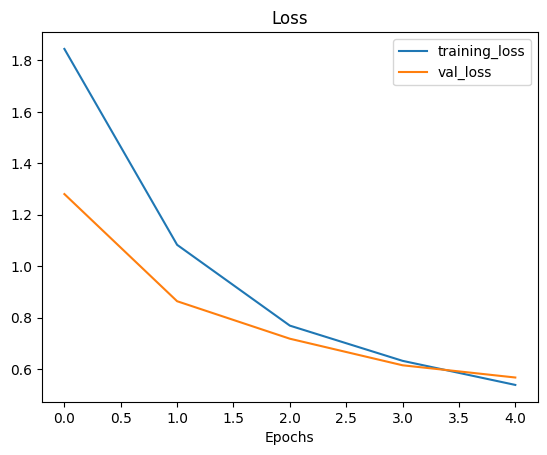

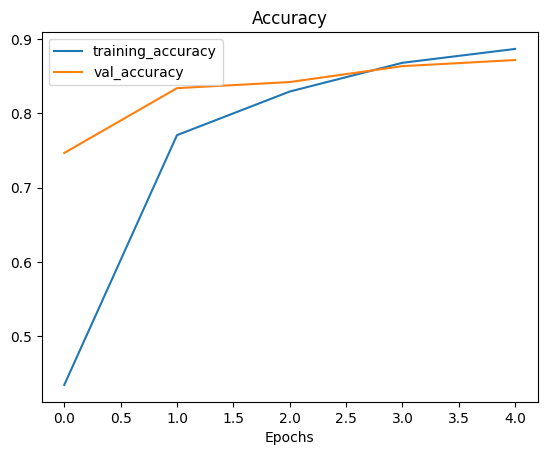

In [ ]:
plot_loss_curves(history_0)

In [ ]:
# evaluate on full dataset
model_0.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.5479 - accuracy: 0.8712


[0.5479389429092407, 0.8712000250816345]

In [ ]:
# check layer in our base model

for layer_number , layer in enumerate(base_model.layers):
  print(layer_number , layer.name)

print(" \n")

for layer_number , layer in enumerate(model_0.layers):
  print(layer_number , layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
# base_model.summary()
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_averge_pooling_laye  (None, 1280)              0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


## Getting a feature vector from trained model

The globaAveragePoolinh2D takes 4d tensor and convert to 2d tensor

In [ ]:
input_shape = (1,4,4,3)

#create random tensor

tf.random.set_seed(43)

input_tensor = tf.random.normal(shape = input_shape , mean = 2 )

print(f"Random input tensor {input_tensor}")

##passing it through GlobalAveragePooling2D layer
print("\n")

global_average_pooled_tensor  = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"Random input tensor {global_average_pooled_tensor}")


input_tensor.shape , global_average_pooled_tensor.shape

Random input tensor [[[[ 1.9794995   0.3894348   1.2751642 ]
   [ 1.4549936   3.0539696   1.108716  ]
   [ 2.0975292   0.89634264  2.4778395 ]
   [ 2.1825523   1.7628111   2.3108687 ]]

  [[ 2.1565282   1.1142128   0.8276601 ]
   [ 3.284182    3.2486129   0.7627096 ]
   [ 1.1313169   1.5505912   2.4442081 ]
   [ 3.4079123   0.66347814  5.2284565 ]]

  [[ 0.09234846  2.1789737   2.08237   ]
   [ 0.93157125  3.246401    1.6027553 ]
   [ 1.4794652   1.7254419   3.956245  ]
   [-1.0211666   2.3617344   2.1500282 ]]

  [[ 1.9632063   3.0056064   3.286677  ]
   [ 1.756321    1.6780796   2.116939  ]
   [ 1.0295618  -0.13743949  1.8951008 ]
   [ 3.6242275   2.7291284   2.8255517 ]]]]


Random input tensor [[1.7218782 1.8417112 2.2719555]]


(TensorShape([1, 4, 4, 3]), TensorShape([1, 3]))

In [ ]:
## lets replicate the function

tf.reduce_mean(input_tensor , axis = [1,2])



# mean across axis (1 , 2)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.7218782, 1.8417112, 2.2719555]], dtype=float32)>

In [ ]:
## Running a series of transfer learning experience

1. `model_1` - use feature extraction transfer learning with 1% of training data with data aurgmentation

2. `model_2` - use feature extraction transfer learning with 10% of training with data argmentation

3. `model_3` - fine tuning trasfer learning on 10 % of the training data with data argmentation

4. `model_4` - fine tuning transfer learning on 100 % of training data with argmentation

## Getting data ready for `model_1`

In [ ]:
# download and unzip data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2023-10-02 09:24:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  23.0MB/s    in 6.8s    

2023-10-02 09:24:43 (18.9 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_per = "10_food_classes_1_percent/train"

test_dir = "10_food_classes_1_percent/test"

In [ ]:
# how many data are there

walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'

In [ ]:
#set up data loaders
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory( train_dir_1_per,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = 32,
                                                                 color_mode = "rgb")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = 32,
                                                                 color_mode = "rgb")


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
## Adding data argmentation right into the layer

# to add data argmentation ,  we can use these

## tf.keras.experimental.preprocessing()

## benifit is  -- preprocessing occure in gpu , additionally we dont need and prepropressing after reusing the model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## creaeting data argmentation sate with horizontal flipping , roration , zooms etc

data_argmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
   #preprocessing.Rescaling(1/255.), #as the efficient net already has it
    ],name = "data_aurgmentation"
)



In [ ]:
# view a random image and view its argmented form

Text(0.5, 1.0, 'argemented sushi')

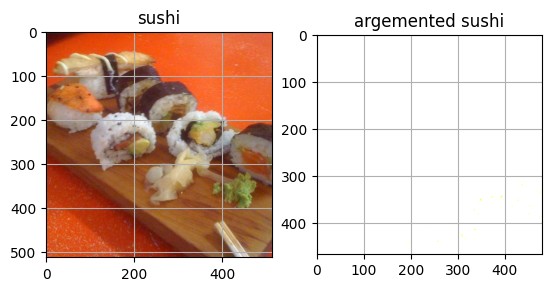

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data.class_names)

target_dir = "10_food_classes_1_percent/train/"+target_class

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

#read in th erandom image
img= mpimg.imread(random_image_path)

plt.subplot(1,2,1)
plt.imshow(img)
plt.title(target_class)
plt.grid()


# now read and plot argmented random image
plt.subplot(1,2,2)
arg_img = data_argmentation(tf.expand_dims(img , axis = 0))
plt.imshow(tf.squeeze(arg_img))
plt.grid()
plt.title("argemented "+ target_class)

## model_1 : Feature extraction transfer learning with 1% data

Saving TensorBoard log files to: transfer_learning/1_percent_data_argmented/20231002-092449
Epoch 1/5
3/3 [==============================] - 13s 3s/step - loss: 2.3894 - accuracy: 0.1143 - val_loss: 2.2487 - val_accuracy: 0.1513
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1090 - accuracy: 0.2714 - val_loss: 2.0932 - val_accuracy: 0.2763
Epoch 3/5
3/3 [==============================] - 4s 1s/step - loss: 1.8930 - accuracy: 0.4571 - val_loss: 1.9924 - val_accuracy: 0.3569
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.7349 - accuracy: 0.5286 - val_loss: 1.8862 - val_accuracy: 0.4145
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.5733 - accuracy: 0.7000 - val_loss: 1.7870 - val_accuracy: 0.4704


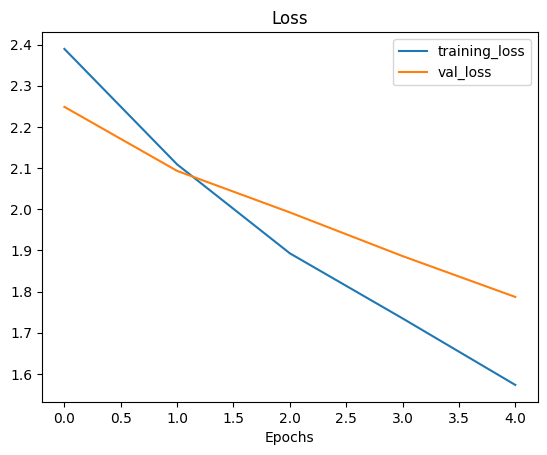

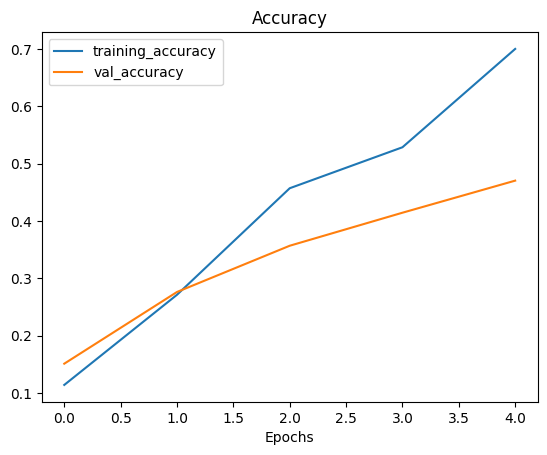

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# create input layer

inputs = layers.Input(shape = (224,224,3) , name = "input_layer")

x = data_argmentation(inputs)

x = base_model(x , training = False)

x= layers.GlobalAveragePooling2D()(x)

# put  a dense layers

outputs = layers.Dense(10 , activation = "softmax" , name = "output_layer")(x)

# make a model

model_1 = keras.Model(inputs , outputs)


# compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

hostory_1 = model_1.fit(train_data,
                        epochs = 5 ,
                        validation_data = test_data ,
                        steps_per_epoch = len(train_data),
                        validation_steps = int( 0.25 * len( test_data), ),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning" ,
                                                                 experiment_name = "1_percent_data_argmented")]
                        )

plot_loss_curves(hostory_1)

In [ ]:
model_1.evaluate(test_data)


79/79 [==============================] - 7s 78ms/step - loss: 1.7850 - accuracy: 0.4828


[1.784987449645996, 0.4828000068664551]

#dataset for model_2

In [ ]:
train_dir_10_per = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
#set up data loaders
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory( train_dir_10_per,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = 32,
                                                                 color_mode = "rgb")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = 32,
                                                                 color_mode = "rgb")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Creating model_2

Saving TensorBoard log files to: transfer_learning/1_percent_data_argmented/20231002-092532
Epoch 1/5
24/24 [==============================] - 23s 636ms/step - loss: 1.9554 - accuracy: 0.3707 - val_loss: 1.3691 - val_accuracy: 0.7220
Epoch 2/5
24/24 [==============================] - 14s 575ms/step - loss: 1.2991 - accuracy: 0.6720 - val_loss: 0.9452 - val_accuracy: 0.7961
Epoch 3/5
24/24 [==============================] - 12s 454ms/step - loss: 0.9925 - accuracy: 0.7693 - val_loss: 0.7496 - val_accuracy: 0.8207
Epoch 4/5
24/24 [==============================] - 11s 463ms/step - loss: 0.8111 - accuracy: 0.8080 - val_loss: 0.6569 - val_accuracy: 0.8339
Epoch 5/5
24/24 [==============================] - 11s 442ms/step - loss: 0.7268 - accuracy: 0.8227 - val_loss: 0.5763 - val_accuracy: 0.8503


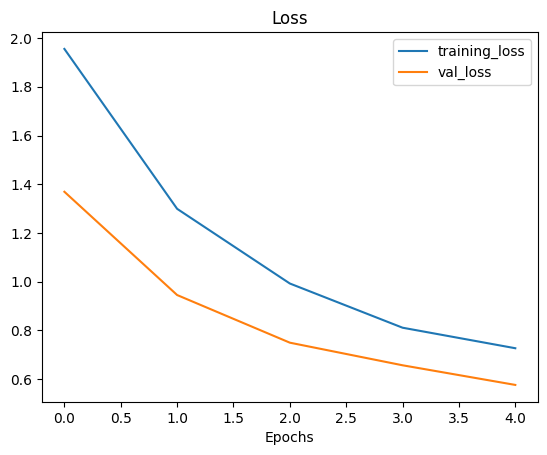

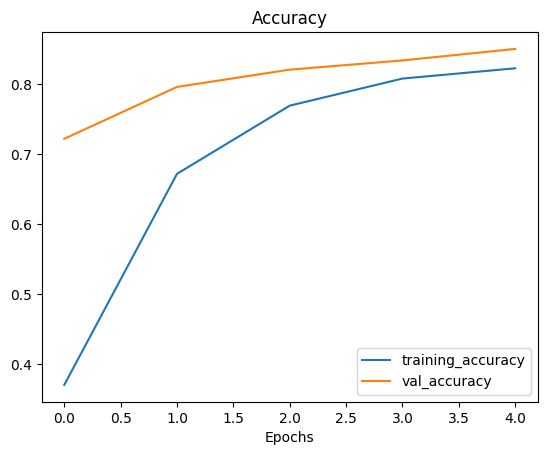

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False )
base_model.trainable = False

inputs = layers.Input(shape = (224,224,3) , name = "Input_layer")

x = data_argmentation(inputs)
x = base_model(x , training = False)
x= layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10 , activation = "softmax"  ,name = "output_layer")(x)

model_2 = keras.Model(inputs , outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

hostory_2 = model_2.fit(train_data,
                        epochs = 5 ,
                        validation_data = test_data ,
                        steps_per_epoch = len(train_data),
                        validation_steps = int( 0.25 * len( test_data), ),
                        callbacks = [create_tensorboard_callback(dir_name = "transfer_learning" ,
                                                                 experiment_name = "1_percent_data_argmented")]
                        )

plot_loss_curves(hostory_2)



In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.6150 - accuracy: 0.8456


[0.6149795055389404, 0.8456000089645386]

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_aurgmentation (Sequen  (None, None, None, 3)     0         
 tial)                                                           
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

## Creating ModelCheckpoint

In [ ]:
# set checkpoint path

checkpoint_path = "10_percent_model_checkpoints_weights/checkpoint.ckpt"

#create a ModelCheckpoint callbacks the model's weights only

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only=True ,
                                                         save_best_only = False,
                                                         verbose = 1,
                                                         save_freq = "epoch")# save for each epoch


## `model_2` with check point

Saving TensorBoard log files to: transfer_learning/1_percent_data_argmented/20231002-092702
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9709 - accuracy: 0.3747
Epoch 1: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 504ms/step - loss: 1.9709 - accuracy: 0.3747 - val_loss: 1.3965 - val_accuracy: 0.7237
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2778 - accuracy: 0.7080
Epoch 2: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 460ms/step - loss: 1.2778 - accuracy: 0.7080 - val_loss: 0.9562 - val_accuracy: 0.7895
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9834 - accuracy: 0.7720
Epoch 3: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 11s 440ms/step - loss: 0.9834 - accuracy: 0.7720 - val_loss: 0.7500 - val_accuracy: 0.8207

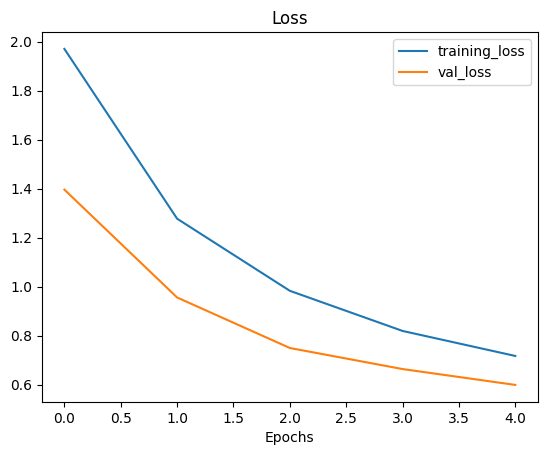

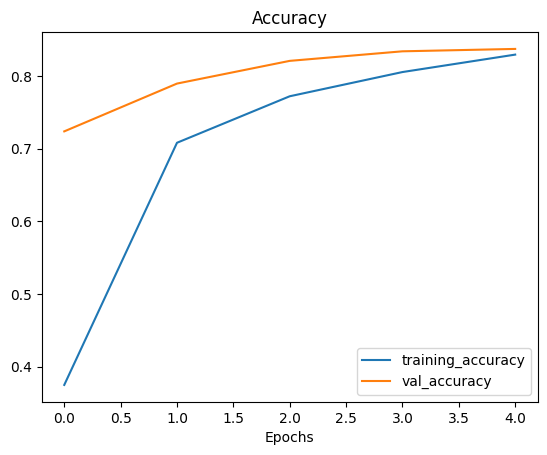

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False )
base_model.trainable = False

inputs = layers.Input(shape = (224,224,3) , name = "Input_layer")

x = data_argmentation(inputs)
x = base_model(x , training = False)
x= layers.GlobalAveragePooling2D()(x)

outputs = layers.Dense(10 , activation = "softmax"  ,name = "output_layer")(x)

model_2 = keras.Model(inputs , outputs)

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

hostory_2 = model_2.fit(train_data,
                        epochs = 5 ,
                        validation_data = test_data ,
                        steps_per_epoch = len(train_data),
                        validation_steps = int( 0.25 * len( test_data), ),
                        callbacks = [checkpoint_callback,create_tensorboard_callback(dir_name = "transfer_learning" ,
                                                                 experiment_name = "1_percent_data_argmented")]
                        )

plot_loss_curves(hostory_2)

In [ ]:
model_0.evaluate(test_data) ,
result_10_percent_data_aug = model_2.evaluate(test_data)

79/79 [==============================] - 6s 77ms/step - loss: 0.6143 - accuracy: 0.8468


## loading in checkpointed weights return a model a specific to specific checkpoints

In [ ]:
## loaf in saved model weights and evaluate model

model_2.load_weights(checkpoint_path)

In [ ]:
# evaluate model_2 with loaded weights
loaded_weight_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.6143 - accuracy: 0.8468


In [ ]:
# check to see loaded model result are very close to our previous non loaded model

import numpy as np

np.isclose(np.array(result_10_percent_data_aug) , np.array(loaded_weight_model_results))

array([ True,  True])

In [ ]:
## cheeck diff between two result

print(np.array(result_10_percent_data_aug) - np.array(loaded_weight_model_results))

[0. 0.]


## Preparing for `model_3`
 fine tuning the parts of model

 **fine tuning works best after training a feature extraction model for a few epochs with large amount of custom data**

In [ ]:
train_dir_10_per = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

#set up data loaders
IMG_SIZE = (224,224)
train_data = tf.keras.preprocessing.image_dataset_from_directory( train_dir_10_per,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = 32,
                                                                 color_mode = "rgb")

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode = "categorical",
                                                                 image_size = IMG_SIZE,
                                                                 batch_size = 32,
                                                                 color_mode = "rgb")



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.layers

In [ ]:
for layers in model_2.layers:
  print(layers," == " , layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7c5553cc9030>  ==  True
<keras.src.engine.sequential.Sequential object at 0x7c5565e9ddb0>  ==  True
<keras.src.engine.functional.Functional object at 0x7c5553b1e590>  ==  True
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7c55657da830>  ==  True
<keras.src.layers.core.dense.Dense object at 0x7c5553b1d690>  ==  True


In [ ]:
for i , layer in enumerate(model_2.layers[2].layers):
  print(i , " == ",layers.name," == " , layer.trainable)

0  ==  output_layer  ==  False
1  ==  output_layer  ==  False
2  ==  output_layer  ==  False
3  ==  output_layer  ==  False
4  ==  output_layer  ==  False
5  ==  output_layer  ==  False
6  ==  output_layer  ==  False
7  ==  output_layer  ==  False
8  ==  output_layer  ==  False
9  ==  output_layer  ==  False
10  ==  output_layer  ==  False
11  ==  output_layer  ==  False
12  ==  output_layer  ==  False
13  ==  output_layer  ==  False
14  ==  output_layer  ==  False
15  ==  output_layer  ==  False
16  ==  output_layer  ==  False
17  ==  output_layer  ==  False
18  ==  output_layer  ==  False
19  ==  output_layer  ==  False
20  ==  output_layer  ==  False
21  ==  output_layer  ==  False
22  ==  output_layer  ==  False
23  ==  output_layer  ==  False
24  ==  output_layer  ==  False
25  ==  output_layer  ==  False
26  ==  output_layer  ==  False
27  ==  output_layer  ==  False
28  ==  output_layer  ==  False
29  ==  output_layer  ==  False
30  ==  output_layer  ==  False
31  ==  output_lay

In [ ]:
# see how many trainable vaiables are in our base model

print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
## to begin fine tuning lets start by settng ;asst 10 layer of base model.trainanle = True



base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

# recompile  (we recompile our mdodel every time we make a change)

model_2.compile(loss = "categorical_crossentropy",
                optimizer  = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])

## when fine tunr lower the learning rate by 10x

In [ ]:
for num , layer in enumerate(model_2.layers[2].layers):
  print(num , layer.name , layer.trainable )

0 input_4 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
## now we have unfroze some layers

print(len(model_2.trainable_variables))

12


In [ ]:
## finr tune for another 5 epochs

fine_tune_epochs = 5 + 5

# refir the model(same as model_2)

history_finr_10_percent_data_aug = model_2.fit(train_data,
                        epochs = fine_tune_epochs,
                        validation_data = test_data ,
                        steps_per_epoch = len(train_data),
                        validation_steps = int( 0.25 * len( test_data), ),
                        initial_epoch = hostory_2.epoch[-1],# start training frpm prev last epoch
                        callbacks = [checkpoint_callback,create_tensorboard_callback(dir_name = "transfer_learning" ,
                                                                 experiment_name = "1_percent_data_argmented")]
                        )



Saving TensorBoard log files to: transfer_learning/1_percent_data_argmented/20231002-092825
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.6370 - accuracy: 0.8240
Epoch 5: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 23s 505ms/step - loss: 0.6370 - accuracy: 0.8240 - val_loss: 0.5059 - val_accuracy: 0.8372
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.5043 - accuracy: 0.8520
Epoch 6: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 387ms/step - loss: 0.5043 - accuracy: 0.8520 - val_loss: 0.4803 - val_accuracy: 0.8372
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.4264 - accuracy: 0.8800
Epoch 7: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 358ms/step - loss: 0.4264 - accuracy: 0.8800 - val_loss: 0.4981 - val_accuracy: 0.8

In [ ]:
# evaluate th emodel

model_2.evaluate(test_data)

79/79 [==============================] - 6s 66ms/step - loss: 0.4440 - accuracy: 0.8560


[0.4440392553806305, 0.8560000061988831]

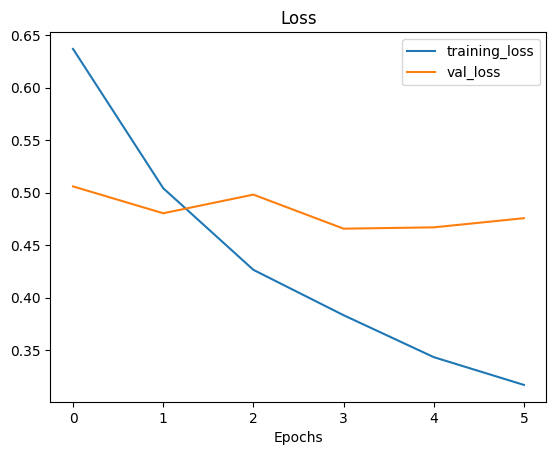

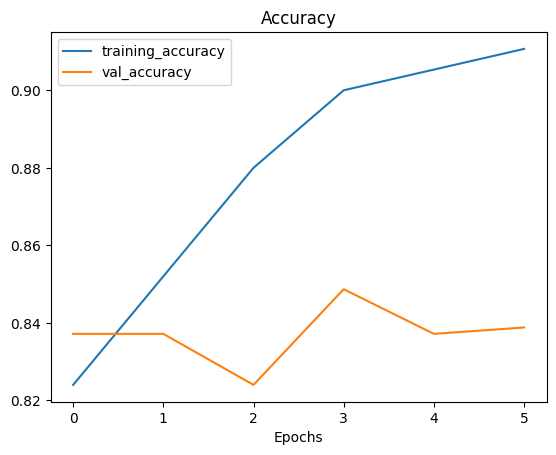

In [ ]:
plot_loss_curves(history_finr_10_percent_data_aug)

The plot_loss_curves function work with model which have ony fit once , we want some thing that compare histories

In [ ]:
# lets ceate a function

def compare_history(original_history , new_history , initial_epochs = 5):

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]


  val_acc =  original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]



  # combine original history

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # make plots
  plt.figure(figsize = (8,9))
  plt.subplot(2,1,1)
  plt.plot(total_acc , label = "training accuracy")
  plt.plot(total_val_acc , label = "val accuracy")
  plt.plot(  [initial_epochs- 1 , initial_epochs-1 ] , plt.ylim() , label = "start fine tuning" )
  plt.legend(loc = "lower right")
  plt.title("training and validation , accuracy")


  plt.figure(figsize = (8,9))
  plt.subplot(2,1,2)
  plt.plot(total_loss , label = "training loss")
  plt.plot(total_val_loss , label = "val loss")
  plt.plot(  [initial_epochs- 1 , initial_epochs-1 ] , plt.ylim() , label = "start fine tuning" )
  plt.legend(loc = "upper right")
  plt.title("training and validation , loss")








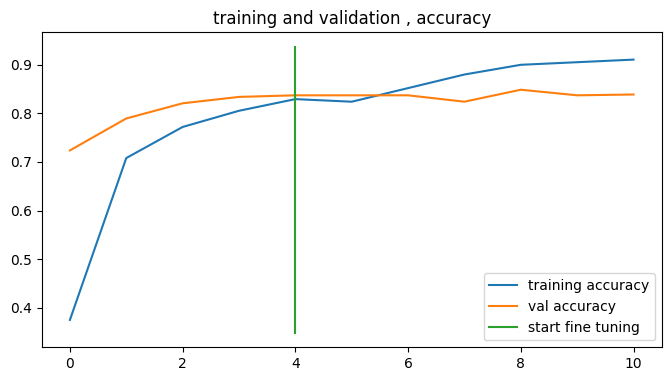

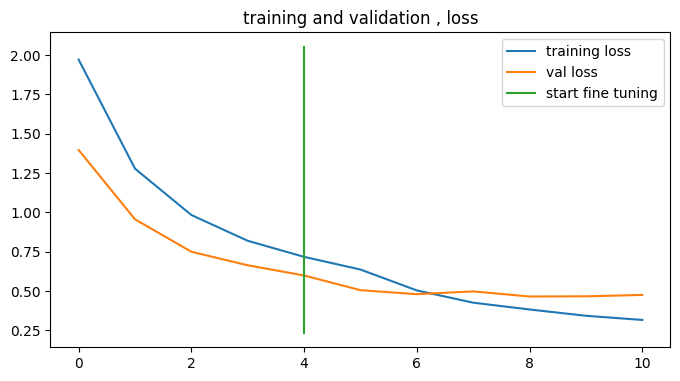

In [ ]:
compare_history(hostory_2 ,history_finr_10_percent_data_aug , initial_epochs = 5 )

## `Model_4` fine tune

In [ ]:
# get 100% of training  data of 10 classes

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2023-10-02 09:29:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.2MB/s    in 24s     

2023-10-02 09:30:15 (20.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
unzip_data("10_food_classes_all_data.zip")

In [ ]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir_all_data = "10_food_classes_all_data/test"

In [ ]:
# how many img we are using
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [ ]:
# set up data input

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode = "categorical",
                                                                                 image_size = (224,224),
                                                                                 color_mode = "rgb",
                                                                                 batch_size = 32)
# set up data input

test = tf.keras.preprocessing.image_dataset_from_directory(test_dir_all_data,
                                                           label_mode = "categorical",
                                                           image_size = (224,224),
                                                           color_mode = "rgb",
                                                           batch_size = 32)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.load_weights(checkpoint_path)


In [ ]:
for num , layer in enumerate(model_2.layers):
  print(num , layer.name , layer.trainable)

0 Input_layer True
1 data_aurgmentation True
2 efficientnetb0 True
3 global_average_pooling2d_3 True
4 output_layer True


In [ ]:
## lets drill intp base model

for num , layer in enumerate(model_2.layers[2].layers):
  print(num , layer.name , layer.trainable)

0 input_4 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# compile
model_2.compile(loss = "categorical_crossentropy",
                optimizer  = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ["accuracy"])



In [ ]:
# fine tune on 100 % data

fine_tune_epoch = 5 + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                        epochs = fine_tune_epoch,
                        validation_data = test_data ,
                        steps_per_epoch = len(train_data_10_classes_full),
                        validation_steps = int( 0.25 * len( test_data), ),
                        initial_epoch = hostory_2.epoch[-1],# start training frpm prev last epoch
                        callbacks = [checkpoint_callback,create_tensorboard_callback(dir_name = "transfer_learning" ,
                                                                 experiment_name = "1_percent_data_argmented")]
                        )

Saving TensorBoard log files to: transfer_learning/1_percent_data_argmented/20231002-093025
Epoch 5/10
235/235 [==============================] - ETA: 0s - loss: 0.5928 - accuracy: 0.8087
Epoch 5: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 82s 309ms/step - loss: 0.5928 - accuracy: 0.8087 - val_loss: 0.3735 - val_accuracy: 0.8783
Epoch 6/10
235/235 [==============================] - ETA: 0s - loss: 0.4942 - accuracy: 0.8363
Epoch 6: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 58s 244ms/step - loss: 0.4942 - accuracy: 0.8363 - val_loss: 0.3338 - val_accuracy: 0.8997
Epoch 7/10
235/235 [==============================] - ETA: 0s - loss: 0.4416 - accuracy: 0.8581
Epoch 7: saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
235/235 [==============================] - 52s 217ms/step - loss: 0.4416 - accuracy: 0.8581 - val_loss: 0.3404 - val_a

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.2701 - accuracy: 0.9164


[0.2701258361339569, 0.9164000153541565]

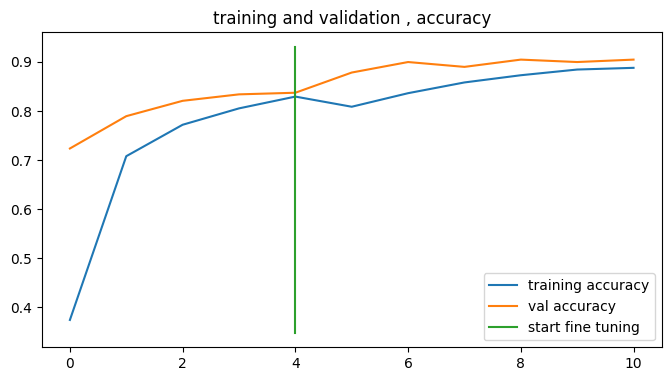

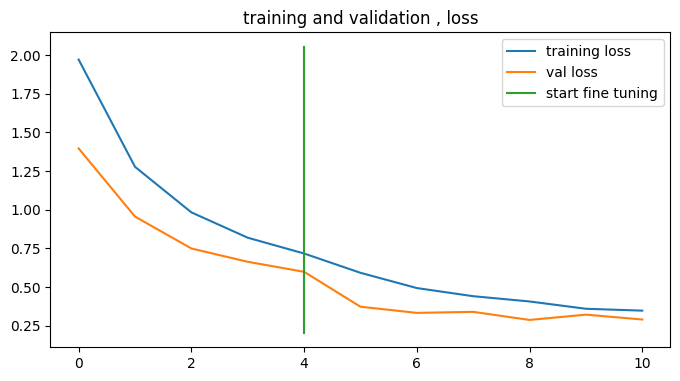

In [ ]:
compare_history(hostory_2 ,history_fine_10_classes_full , initial_epochs = 5 )

In [ ]:
## view on tensorboard

!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments wirg 10 Food101 Classes"\
  --one_shot # exit uploaded

2023-10-02 09:40:50.013411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   BPG-NKQ-HFN

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line